In [2]:
import pandas as pd, numpy as np, networkx as nx, matplotlib.pyplot as plt
import wfc

from importlib import reload

In [ ]:
reload(wfc);

In [3]:
x, y = 30, 30

adj = np.array([
    [1, 1, 0, 0],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 1],
])

options = set(range(len(adj)))

w = wfc.WaveMap(x, y, adj)
w.run()

completed in 842 steps


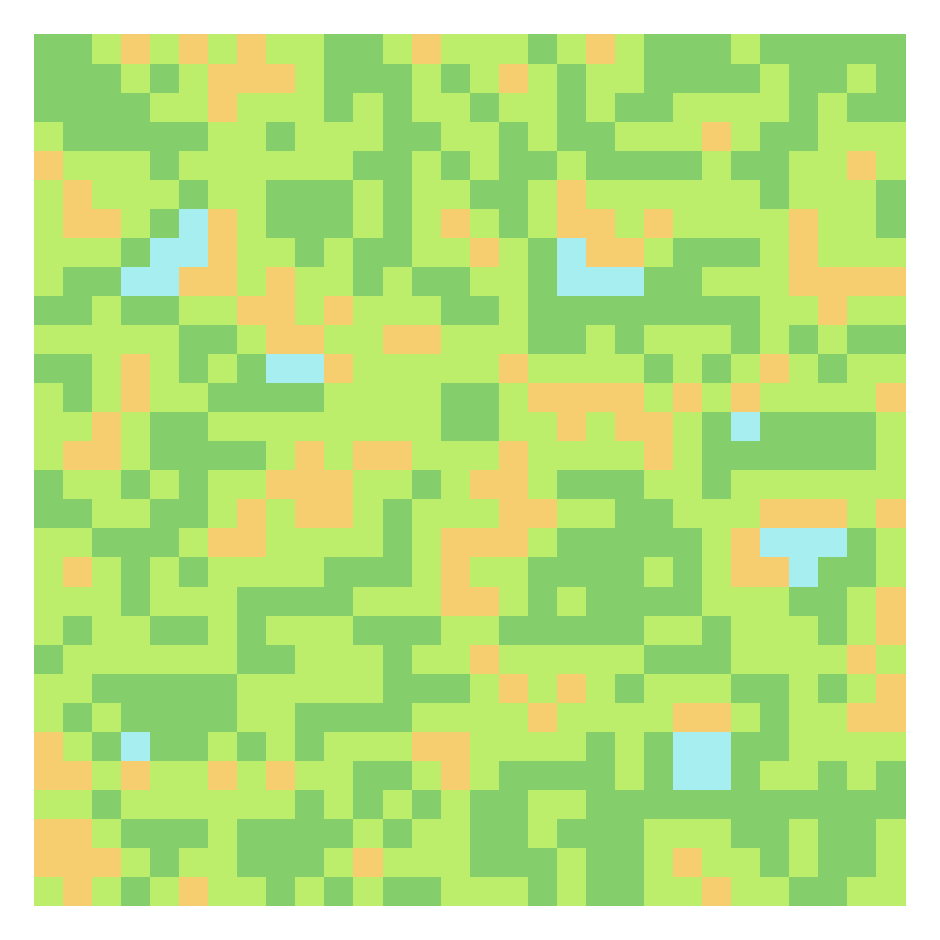

In [4]:
cmap = {
    0 : '#A6EEF0',
    1 : '#84CE6B',
    2 : '#BCED6B',
    3 : '#F7CE6F',
}

def get_map_color(wave, x):
    options = list(wave.G.nodes[x]['options'])
    if len(options) == 1:
        return cmap[options[0]]
    return '#EDEDED'

positions = {i: np.unravel_index(i, (x, y)) for i in w.G.nodes}

nx.draw(
    w.G,
    pos=positions,
    node_color=[get_map_color(w, x) for x in w.G.nodes],
    node_size=w.x*w.y,
    node_shape='s',
    # edgecolors=None,
    # font_size=6,
    linewidths=0,
    width=0,
    # edgecolors="black"
    # with_labels=True,
)

fig = plt.gcf()

max_len = (w.x * w.y) / 70

if y > x:
    fig.set_size_inches(x/y * max_len, max_len)
else:
    fig.set_size_inches(max_len, y/x * max_len)

plt.margins(0, 0)

plt.show();